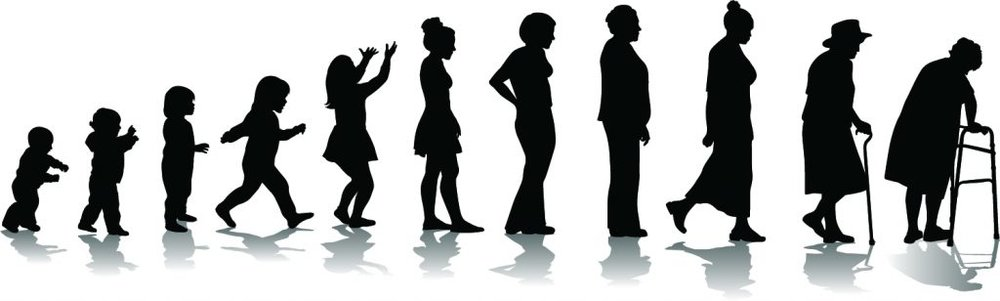

# <center>Age and Gender Prediction</center>


The <a href="https://susanqq.github.io/UTKFace/" style="color:#D18358"> UTKFace dataset </a> is a large-scale face dataset consisting of over 20,000 images. The images cover a wide range of ages and races and include both males and females. 

Using this dataset, I will be attempting to create a model capable of predicting the age and gender of an individual. I will be using part one of the cropped variations of the images, of which there are almost 10,000. However, I will only be using the first 8000 of these images due to memory limitations.

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home" style="background-color:#D18358; border-color:#D18358">Table of Contents</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#imports" role="tab" aria-controls="profile" style="color:#8F908E">Imports<span class="badge badge-primary badge-pill" style="background-color:#D18358; border-color:#D18358">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#load" role="tab" aria-controls="messages" style="color:#8F908E">Loading Data<span class="badge badge-primary badge-pill" style="background-color:#D18358; border-color:#D18358">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#visual" role="tab" aria-controls="settings" style="color:#8F908E">Visualising Data<span class="badge badge-primary badge-pill" style="background-color:#D18358; border-color:#D18358">3</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#split" role="tab" aria-controls="settings" style="color:#8F908E">Train Test Split<span class="badge badge-primary badge-pill" style="background-color:#D18358; border-color:#D18358">4</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#model" role="tab" aria-controls="settings" style="color:#8F908E"> Creating the Model<span class="badge badge-primary badge-pill" style="background-color:#D18358; border-color:#D18358">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#train" role="tab" aria-controls="settings" style="color:#8F908E">Training the Models<span class="badge badge-primary badge-pill"  style="background-color:#D18358; border-color:#D18358">6</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#eval" role="tab" aria-controls="settings" style="color:#8F908E">Evaluating the Models<span class="badge badge-primary badge-pill"  style="background-color:#D18358; border-color:#D18358">7</span></a>  

# <h1 id= 'imports'><span class="label label-default" style="background-color:#D18358; font-size:20px">1. Imports</span></h1>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
#from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Concatenate, Flatten, Dense,Conv2DTranspose,Dropout
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


# <h1 id= 'load'><span class="label label-default" style="background-color:#D18358; font-size:20px">2. Loading Data</span></h1>

In [24]:
images = []
ages = []
genders = []

for i in os.listdir(r'D:\crop_part1')[0:8000]:
    split = i.split('_')
    if len(split) > 0 and split[0].isdigit():
        age = int(split[0])
        ages.append(age)
    if len(split) > 1 and split[1] in ["0", "1"]:
        gender = split[1]
        genders.append(gender)
    images.append(Image.open(os.path.join(r'D:\crop_part1', i)))

In [25]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

Images  Ages Genders
0     <PIL.JpegImagePlugin.JpegImageFile image mode=...   100       1
1     <PIL.JpegImagePlugin.JpegImageFile image mode=...   100       1
2     <PIL.JpegImagePlugin.JpegImageFile image mode=...   101       1
3     <PIL.JpegImagePlugin.JpegImageFile image mode=...    10       0
4     <PIL.JpegImagePlugin.JpegImageFile image mode=...    10       0
...                                                 ...   ...     ...
7995  <PIL.JpegImagePlugin.JpegImageFile image mode=...    63       1
7996  <PIL.JpegImagePlugin.JpegImageFile image mode=...    63       1
7997  <PIL.JpegImagePlugin.JpegImageFile image mode=...    63       1
7998  <PIL.JpegImagePlugin.JpegImageFile image mode=...    63       1
7999  <PIL.JpegImagePlugin.JpegImageFile image mode=...    63     NaN

[8000 rows x 3 columns]

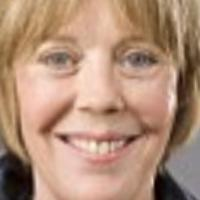

63 nan


In [5]:
display(df['Images'][7999])
print(df['Ages'][7999], df['Genders'][7999])

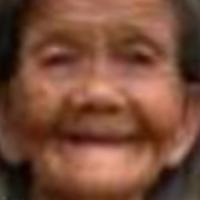

100 1


In [6]:
display(df['Images'][1])
print(df['Ages'][1], df['Genders'][1])

So 0 corresponds to male, 1 corresponds to female.

# <h1 id= 'visual'><span class="label label-default" style="background-color:#D18358; font-size:20px">3. Visualising and Preparing Data</span></h1>

C:\Users\nhtqu\AppData\Local\Temp\ipykernel_12576\409036286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

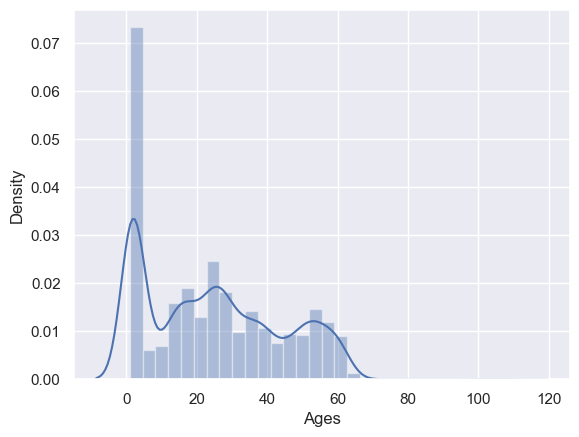

In [26]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

Too many faces of people between 0 and 4 years old. The model would fit too well to these ages and not enough to the other ages. To resolve this I'm only going to include a third of the images between these ages.

In [27]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

C:\Users\nhtqu\AppData\Local\Temp\ipykernel_12576\2036663787.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

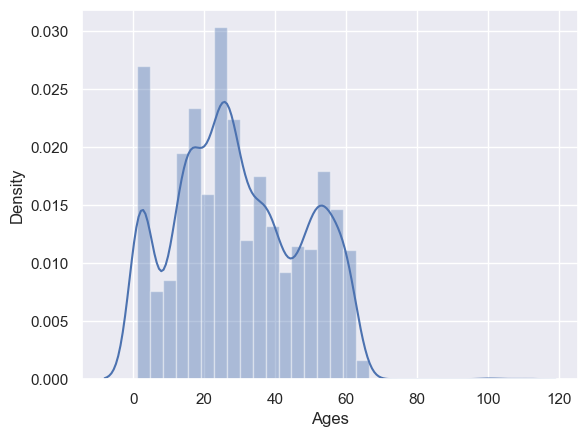

In [28]:
sns.distplot(df['Ages'],kde=True, bins=30)

This looks much better! The dataframe is more representative of the population now. However, there aren't many images of people over 80, which would cause the model to not train well enough on those ages. It's best to just remove over 80s and only have a model that can predict the ages of people under 80.

In [29]:
df = df[df['Ages'] < 80]

C:\Users\nhtqu\AppData\Local\Temp\ipykernel_12576\2749225890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

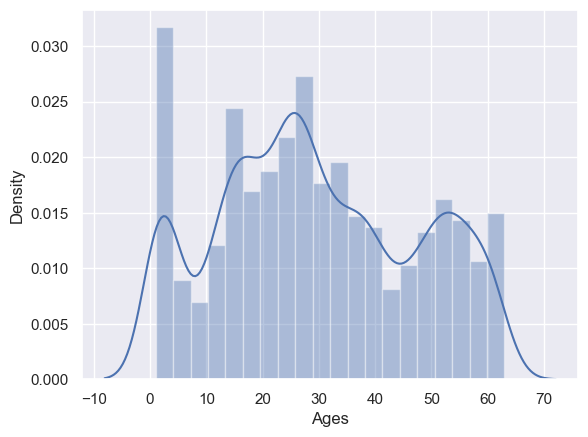

In [30]:
sns.distplot(df['Ages'],kde=True, bins=20)

<Axes: xlabel='Genders', ylabel='count'>

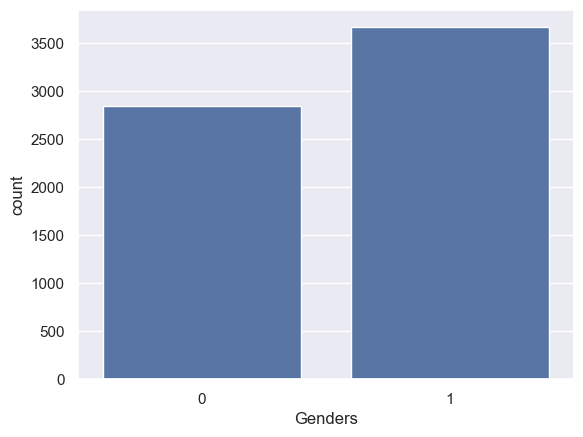

In [31]:
sns.countplot(data=df,x='Genders')

Not sure what 3 corresponds to - both genders, no gender, unknown, or just an error in the data entry? To be safe, I am going to remove any rows where gender equals 3.

<Axes: xlabel='Genders', ylabel='count'>

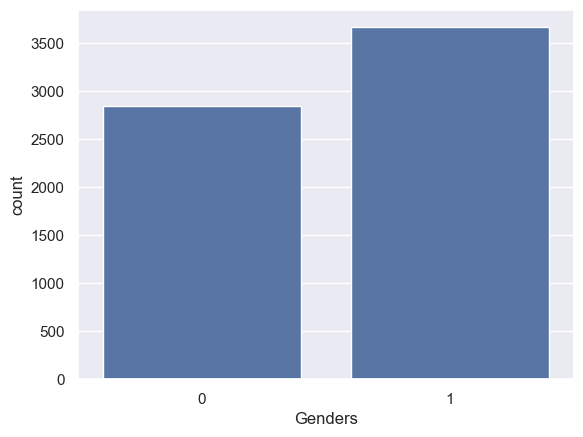

In [32]:
df = df.dropna(subset=['Genders'])
df = df.reset_index(drop=True)
df = df.dropna(subset=['Genders'])
sns.countplot(data=df,x='Genders')

In [33]:
x = []
y = []

for i in range(len(df)):
    # Check if age and gender values are not NaN before conversion
    if pd.notna(df['Images'].iloc[i]):
        df['Images'].iloc[i] = df['Images'].iloc[i].resize((200, 200), Image.ANTIALIAS)
        ar = np.asarray(df['Images'].iloc[i])
        x.append(ar)
        
        if pd.notna(df['Ages'].iloc[i]) and pd.notna(df['Genders'].iloc[i]):
            agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
            y.append(agegen)
        else:
            # Handle missing age or gender values as needed (e.g., skip or assign a default)
            pass

x = np.array(x)
y = np.array(y)


C:\Users\nhtqu\AppData\Local\Temp\ipykernel_12576\4102755349.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200, 200), Image.ANTIALIAS)
C:\Users\nhtqu\AppData\Local\Temp\ipykernel_12576\4102755349.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200, 200), Image.ANTIALIAS)
C:\Users\nhtqu\AppData\Local\Temp\ipykernel_12576\4102755349.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200, 200), Image.ANTIALIAS)
C:\Users\nhtqu\AppData\Local\Temp\ipykernel_12576\4102

# <h1 id= 'split'><span class="label label-default" style="background-color:#D18358; font-size:20px">4. Train Test Split</span></h1>

In [34]:

y_age = df['Ages']
y_gender = df['Genders']
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

# <h1 id= 'model'><span class="label label-default" style="background-color:#D18358; font-size:20px">5. Creating the Models</span></h1>

I will create two individual models - one to predict age and one to predict gender. The age model should be capable of returning continuous values which I will round to the nearest integer, and the gender model should return a binary result.

In [35]:

#def age_enet_model(input_shape):
#    inputs = Input(input_shape)
    
    # Mã hóa
#    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
#    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
#    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Giải mã
#    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
#    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
#    up1 = UpSampling2D(size=(2, 2))(conv2)
#    concat1 = Concatenate()([conv1, up1])

    # Cuối cùng, dự đoán tuổi
#    age_output = Conv2D(1, 1, activation='linear')(concat1)

#    model = Model(inputs=inputs, outputs=age_output)
#    return model
base_model_1 = tf.keras.applications.efficientnet.EfficientNetB3(include_top=False,
                                                               weights="imagenet",
                                                               input_shape = (200, 200, 3),
                                                               pooling = "max"
                                                              )
base_model_1.trainable = True

x = base_model_1.output
#x = BatchNormalization() (x)
x = Dense(128, activation = "relu") (x)
#x = Dropout(0.3) (x)
output1 = Dense(1, activation = "linear") (x)
# Tạo mô hình U-Net dự đoán tuổi
#input_shape = (200, 200, 3)  # Điều chỉnh kích thước ảnh đầu vào tùy theo dữ liệu của bạn
#agemodel = age_enet_model(input_shape)
agemodel = Model(inputs = base_model_1.input, outputs = output1)
# Biên dịch mô hình với hàm mất mát và trình tối ưu
agemodel.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
agemodel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_8 (Rescaling)        (None, 200, 200, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization_4 (Normalization  (None, 200, 200, 3)  7          ['rescaling_8[0][0]']            
 )                                                                                                
                                                                                            

In [19]:

#def gender_unet_model(input_shape):
#    inputs = Input(input_shape)
    
    # Mã hóa
#    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
#    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
#    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Giải mã
#    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
#    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
#    up1 = UpSampling2D(size=(2, 2))(conv2)
#    concat1 = Concatenate()([conv1, up1])

    # Cuối cùng, dự đoán giới tính
#    gender_output = Conv2D(1, 1, activation='sigmoid')(concat1)

#    model = Model(inputs=inputs, outputs=gender_output)
#    return model

# Tạo mô hình U-Net dự đoán giới tính
#input_shape = (200, 200, 3)  # Điều chỉnh kích thước ảnh đầu vào tùy theo dữ liệu của bạn
#gendermodel = gender_unet_model(input_shape)
base_model_2 = tf.keras.applications.efficientnet.EfficientNetB3(include_top=False,
                                                               weights="imagenet",
                                                               input_shape = (200, 200, 3),
                                                               pooling = "max"
                                                              )
base_model_2.trainable = True

y = base_model_2.output
#x = BatchNormalization() (x)
y = Dense(128, activation = "relu") (y)
#x = Dropout(0.3) (x)
output2 = Dense(1, activation = "sigmoid") (y)
# Biên dịch mô hình với hàm mất mát và trình tối ưu
gendermodel = Model(inputs = base_model_2.input, outputs = output2)
gendermodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
def gender_unet_model(input_shape):
    inputs = Input(input_shape)
    
    # Encoding
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    drop3 = Dropout(0.5)(conv3)
# Decoding
    up4 = Conv2DTranspose(128,2,strides=(2,2),padding='same')(drop3)
    concat4 = Concatenate()([conv2, up4])
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(concat4)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)
    up5 = Conv2DTranspose(64,2,strides=(2,2),padding='same')(conv4)
    concat5 = Concatenate()([conv1, up5])
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(concat5)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)

    # Đầu ra giống mô hình MobileNetV2
    x = GlobalAveragePooling2D()(conv5)
    x = Dense(1, activation='relu')(x)
    gender_output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=gender_output)
    return model


input_shape = (256, 256, 3)
gendermodel = gender_unet_model(input_shape)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=3,         # Number of epochs with no improvement after which training will be stopped
                               verbose=1,          # Provide verbose output
                               restore_best_weights=True)  # Restore the best model weights

gender_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_gender_datagen = ImageDataGenerator(rescale=1./255)

train_gender = gender_datagen.flow(x_train_gender, y_train_gender, batch_size=16)
test_gender = test_gender_datagen.flow(x_test_gender, y_test_gender, batch_size=16)

history_gender = gendermodel.fit(train_gender, 
                                epochs=10, 
                                shuffle=True, 
                                validation_data=test_gender,
                                callbacks=[early_stopping])  # Include the early stopping callback

agemodel.save('gender_age_beta.h5')


# <h1 id= 'train'><span class="label label-default" style="background-color:#D18358; font-size:20px">6. Training the Models</span></h1>

In [17]:

age_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_age=ImageDataGenerator(rescale=1./255)
train_age = age_datagen.flow(x_train_age, y_train_age, batch_size=16)
test_age = age_datagen.flow(x_test_age, y_test_age, batch_size=16)

history_age = agemodel.fit(train_age, epochs=5, shuffle=True, validation_data=test_age)

agemodel.save('model_age_beta.h5')

Epoch 1/5
326/326 [==============================] - 2080s 6s/step - loss: 142.2558 - mae: 8.9669 - val_loss: 308.6644 - val_mae: 14.6450
Epoch 2/5
326/326 [==============================] - 1994s 6s/step - loss: 84.0930 - mae: 6.7874 - val_loss: 318.4583 - val_mae: 15.0345
Epoch 3/5
326/326 [==============================] - 1971s 6s/step - loss: 63.7552 - mae: 5.9168 - val_loss: 414.2007 - val_mae: 15.8477
Epoch 4/5
326/326 [==============================] - 1954s 6s/step - loss: 54.9178 - mae: 5.4978 - val_loss: 12535.8867 - val_mae: 68.6082
Epoch 5/5
326/326 [==============================] - 1978s 6s/step - loss: 47.2299 - mae: 5.0874 - val_loss: 72043.7266 - val_mae: 244.8225


TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [20]:
gender_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
test_gender = ImageDataGenerator(rescale=1./255)
train_gender = gender_datagen.flow(x_train_gender, y_train_gender, batch_size=16)
test_gender = gender_datagen.flow(x_test_gender, y_test_gender, batch_size=16)
history_gender = gendermodel.fit(train_gender, epochs=10, shuffle=True, validation_data=test_gender)
agemodel.save('gender_age_beta.h5')

Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1053, in launch_instance
      app.start()
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\nhtqu\AppData\Local\Temp\ipykernel_3472\3986934574.py", line 10, in <module>
      history_gender = gendermodel.fit(train_gender, epochs=10, shuffle=True, validation_data=test_gender)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\nhtqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 2145, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_145714]

# <h1 id= 'eval'><span class="label label-default" style="background-color:#D18358; font-size:20px">7. Evaluating the Models</span></h1>

Now to evaluate the models I am going to use some external images of celebrities. These celebrities are of a variety of ages and genders.

In [25]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
    gender = np.round(gendermodel.predict(ar))
    # if gender == 0:
    #     gender = 'male'
    # elif gender == 1:
    #     gender = 'female'
        
    print('Age:', int(age), '\n Gender:', gender)
    return im.resize((300,300), Image.ANTIALIAS)

## <p style="font-size:20px; color:#D18358"> Alyson Hannigan </p>

In [17]:
process_and_predict('../input/celebrities2/alyson.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '../input/celebrities2/alyson.jpg'

## <p style="font-size:20px; color:#D18358"> David Boreanaz </p>

In [26]:
process_and_predict('test.jpg')

1/1 [==============================] - 0s 93ms/step


C:\Users\Admin\AppData\Local\Temp\ipykernel_16128\2647903005.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 0s 125ms/step


TypeError: only size-1 arrays can be converted to Python scalars

## <p style="font-size:20px; color:#D18358"> Gaten Matarazzo </p>

In [ ]:
process_and_predict('../input/celebrities2/gaten.jpg')

## <p style="font-size:20px; color:#D18358"> Jack Dylan Grazer </p>

In [ ]:
process_and_predict('../input/celebrities2/jack.jpg')

## <p style="font-size:20px; color:#D18358"> Jennifer Garner </p>

In [ ]:
process_and_predict('../input/celebrities2/jennifer.jpg')

## <p style="font-size:20px; color:#D18358"> Jennifer Lawrence </p>

In [ ]:
process_and_predict('../input/celebrities2/jenniferlaw.jpg')

## <p style="font-size:20px; color:#D18358"> Meryl Streep </p>

In [ ]:
process_and_predict('../input/celebrities2/meryl.jpg')

## <p style="font-size:20px; color:#D18358"> Millie Bobby Brown </p>

In [ ]:
process_and_predict('../input/celebrities2/millie.jpg')

## <p style="font-size:20px; color:#D18358"> Morgan Freeman </p>

In [ ]:
process_and_predict('../input/celebrities2/morgan.jpg')

## <p style="font-size:20px; color:#D18358"> Oprah Winfrey </p>

In [ ]:
process_and_predict('../input/celebrities2/oprah.jpg')

## <p style="font-size:20px; color:#D18358"> Tom Hanks </p>

In [ ]:
process_and_predict('../input/celebrities2/tom.jpg')

## <p style="font-size:20px; color:#D18358"> Winona Ryder </p>

In [ ]:
process_and_predict('../input/celebrities2/winona.jpg')

You can decide for yourself if you think it worked, but for the most part I think it did quite well, especially for gender where it only got one celebrity incorrect! I hope you enjoyed and thank you for reading!

<p> Special thanks to Marco Vasquez E for his <a style="color:#D18358" href="https://www.kaggle.com/marcovasquez/useful-html-for-jupyter-notebook"> notebook</a> on 
Useful HTML for Jupyter Notebook. Couldn't have done the beautiful table of contents without it! </p>